<div style="text-align:center; color:#FF0000; font-size:80px">
Traffic Signs Recognition</br>

<img src="./traffic_pic.jpeg" style="width:900px; height:auto">
</div>

## <span style="color:  #ff924a ; font-size:60px">Introduction :</span>

-  In this notebook, we will build a traffic signs recognition system using deep learning techniques.
- The goal of this project is to develop a model capable of identifying and classifying traffic signs from images.
- This system can be useful for various applications, including autonomous vehicles and traffic management.

## <span style="color:  #ff924a ; font-size:60px">Références :</span>

- Useful links :
    - Traffic signs dataset : <a href="https://drive.google.com/file/d/13LZVpPj7UbPZFeyG5ab2OMIWuVJ5duZc/view?usp=drive_link">Traffic_Signs_Recognition </a>
    
- My-links :
    - Git_hub : <a href="https://github.com/SouLayman2022/Traffic_Signs_Recognition.git">Repo GitHub</a>
    - linked_in : <a href="https://www.linkedin.com/in/soulayman-el-guasmi-13b890240/">Linkedin page</a>
    - Get to know me ! <a href="https://soulayman2022.github.io/Data_Scientist_Portfolio/">My Portfolio page</a>

## <span style="color:#00FF00; font-size:60px">Table of Contents :</span>
- 1 [Exploring the Dataset](#1-Exploring-the-Dataset)

- 2 [Preprocessing the Dataset](#2-Preprocessing-the-Dataset)

- 3 [Building the CNN Model](#3-Building-the-CNN-Model)

- 4 [Training and Evaluating the Model](#4-Training-and-Evaluating-the-Model)

- 5 [Conclusion](#5-Conclusion)

## 1 Exploring the Dataset

Exploring the traffic signs dataset to understand its structure and contents...
Number of classes: 43
Class 0: 210 images
Class 1: 2220 images
Class 2: 2250 images
Class 3: 1410 images
Class 4: 1980 images
Class 5: 1860 images
Class 6: 420 images
Class 7: 1440 images
Class 8: 1410 images
Class 9: 1470 images
Class 10: 2010 images
Class 11: 1320 images
Class 12: 2100 images
Class 13: 2160 images
Class 14: 780 images
Class 15: 630 images
Class 16: 420 images
Class 17: 1110 images
Class 18: 1200 images
Class 19: 210 images
Class 20: 360 images
Class 21: 330 images
Class 22: 390 images
Class 23: 510 images
Class 24: 270 images
Class 25: 1500 images
Class 26: 600 images
Class 27: 240 images
Class 28: 540 images
Class 29: 270 images
Class 30: 450 images
Class 31: 780 images
Class 32: 240 images
Class 33: 689 images
Class 34: 420 images
Class 35: 1200 images
Class 36: 390 images
Class 37: 210 images
Class 38: 2070 images
Class 39: 300 images
Class 40: 360 images
Class 41: 240 images
Class 42:

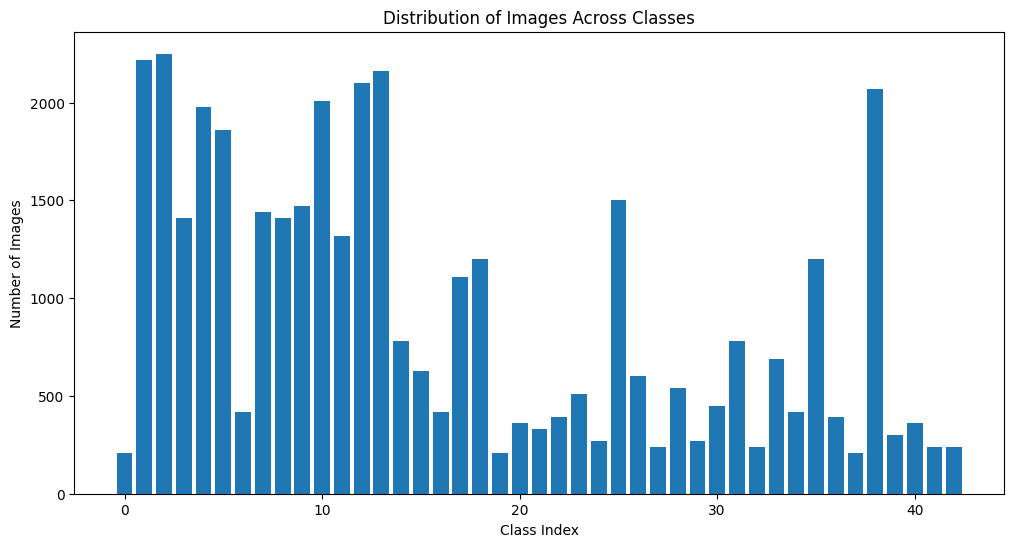

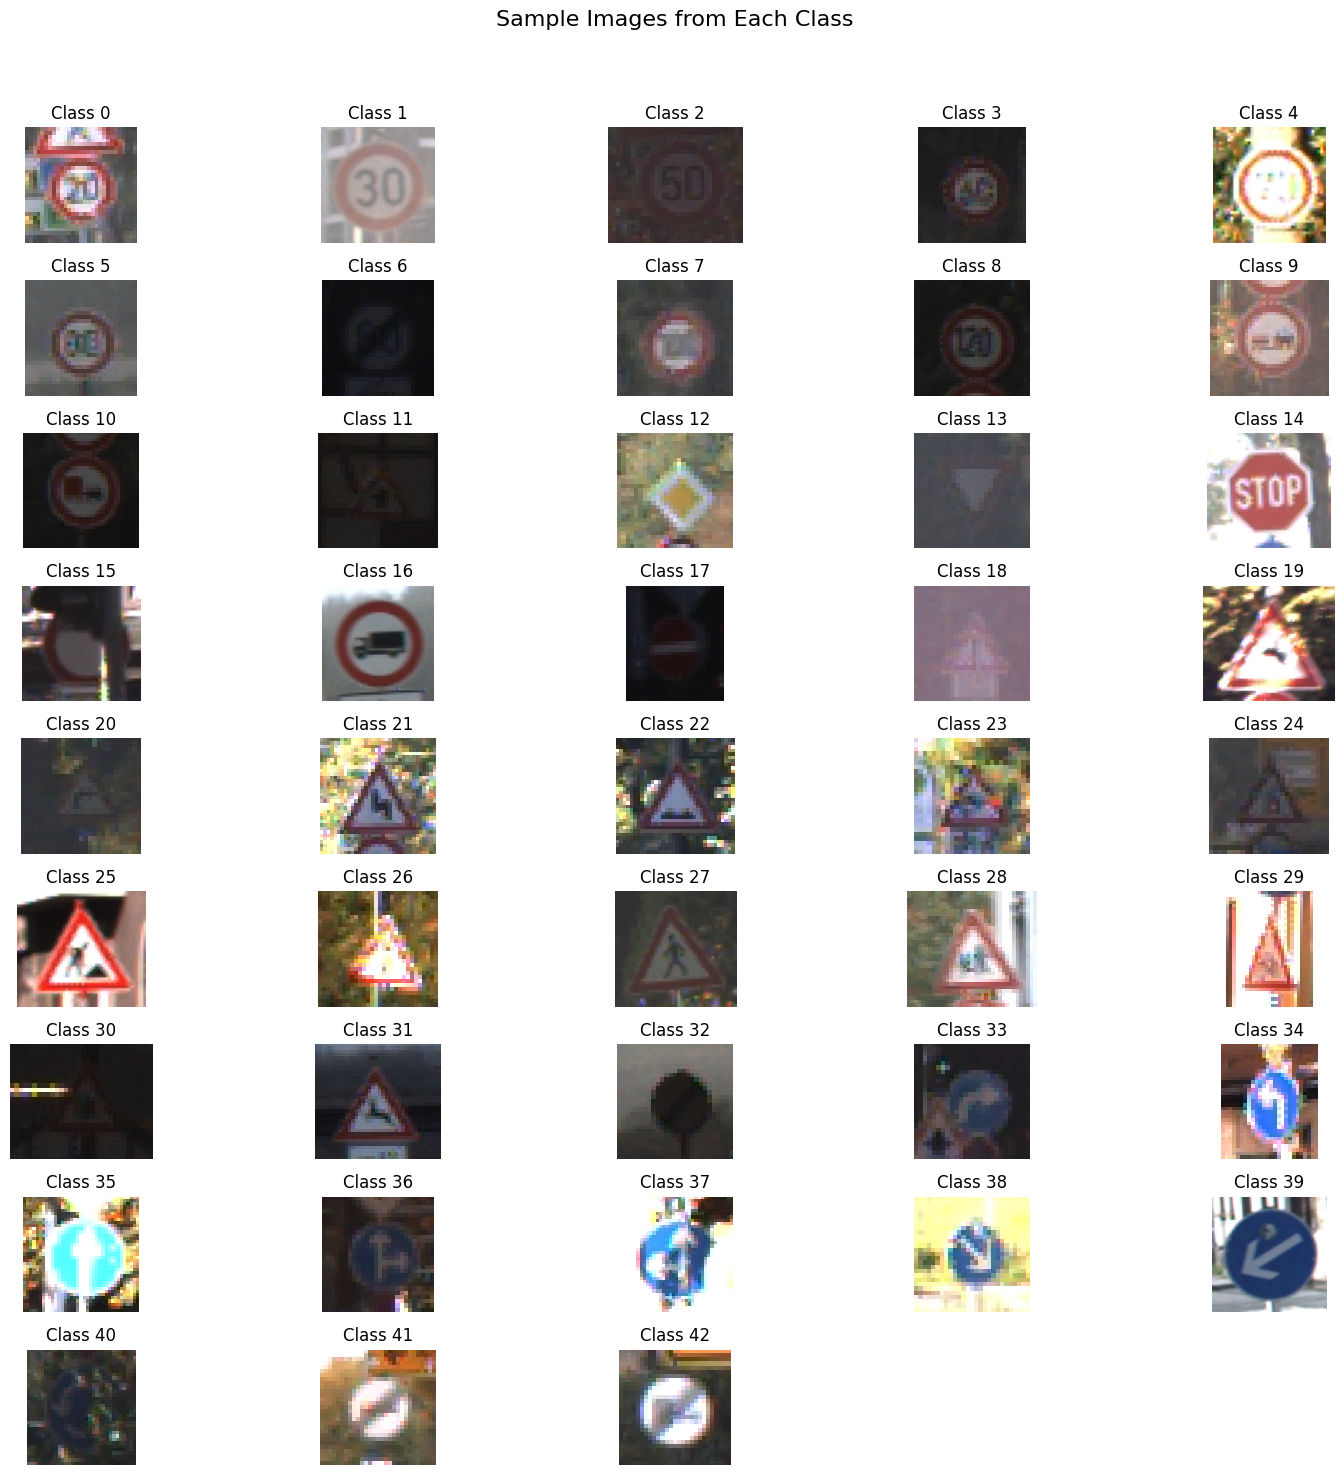

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Define paths to train and test folders
train_dir = r'C:\Users\soula\Desktop\Projects\Traffic_Signs_Recognition\TSR\Train'
test_dir = r'C:\Users\soula\Desktop\Projects\Traffic_Signs_Recognition\TSR\Test'

# Step 2: Explore the dataset
print("Exploring the traffic signs dataset to understand its structure and contents...")

# Get the number of classes
num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")

# Count number of images in each class
class_counts = []
class_folders = sorted(os.listdir(train_dir), key=lambda x: int(x))  # Sort by numeric value
for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    num_images = len(os.listdir(class_path))
    class_counts.append(num_images)
    print(f"Class {class_folder}: {num_images} images")

# Plot distribution of images across classes
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), class_counts)
plt.xlabel('Class Index')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.show()

# Visualize sample images from each class
fig, axes = plt.subplots((num_classes + 4) // 5, 5, figsize=(15, 15))
fig.suptitle('Sample Images from Each Class', fontsize=16)

for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(train_dir, class_folder)
    img_file = os.listdir(class_path)[0]  # Select the first image from each class
    img_path = os.path.join(class_path, img_file)
    
    try:
        image = Image.open(img_path)
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Class {class_folder}")
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

# Hide any remaining empty subplots
for j in range(i + 1, axes.size):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 2 Preprocessing the Dataset

In [3]:
# Step 3: Load and preprocess the dataset
data = []
labels = []

# Load images from train directory
for class_folder in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_folder)
    for img_file in sorted(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path)
            image = image.resize((30, 30))
            data.append(np.array(image))
            labels.append(int(class_folder))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

## 3 Building the CNN Model

In [4]:
# Step 4: Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

C:\Users\soula\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

## 4 Training and Evaluating the Model

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2908 - loss: 2.6366 - val_accuracy: 0.8958 - val_loss: 0.3963
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8459 - loss: 0.4931 - val_accuracy: 0.9657 - val_loss: 0.1172
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9311 - loss: 0.2240 - val_accuracy: 0.9821 - val_loss: 0.0643
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9590 - loss: 0.1353 - val_accuracy: 0.9837 - val_loss: 0.0558
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9698 - loss: 0.0957 - val_accuracy: 0.9906 - val_loss: 0.0392
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9760 - loss: 0.0760 - val_accuracy: 0.9902 - val_loss: 0.0351
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9806 - loss: 0.0660 - val_accuracy: 0.9948 - val_loss: 0.0231
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9830 - loss: 0.0544 - val

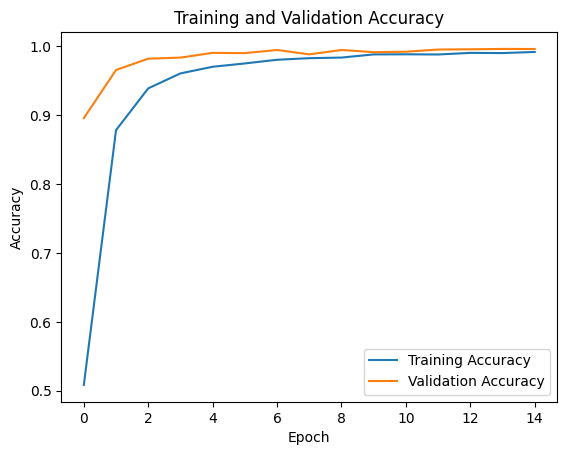

Unique test labels: [    0     1     2 ... 12627 12628 12629]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0259 - loss: 78.3736 
Test Loss: 78.8565
Test Accuracy: 0.0233


In [5]:
# Step 5: Train the CNN model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Step 6: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step 7: Evaluate the model on the test dataset

# Load and preprocess the test dataset
test_data = []
test_labels = []

for img_file in sorted(os.listdir(test_dir)):
    img_path = os.path.join(test_dir, img_file)
    try:
        image = Image.open(img_path)
        image = image.resize((30, 30))
        test_data.append(np.array(image))
        test_labels.append(int(img_file.split('.')[0]))  # Extract label from filename
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

# Convert test data and labels to numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Normalize pixel values
test_data = test_data / 255.0

# Inspect the unique values in test_labels
unique_test_labels = np.unique(test_labels)
print(f"Unique test labels: {unique_test_labels}")

# Ensure test labels are within the valid range
valid_test_indices = [i for i, label in enumerate(test_labels) if label < num_classes]
test_data_valid = [test_data[i] for i in valid_test_indices]
test_labels_valid = [test_labels[i] for i in valid_test_indices]

# Convert valid test labels to categorical
test_labels_categorical = to_categorical(test_labels_valid, num_classes=num_classes)

# Evaluate the model on the cleaned test data
test_loss, test_accuracy = model.evaluate(np.array(test_data_valid), np.array(test_labels_categorical))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

<span style="color:red;font-size:30px">Model accuracy is very low, i will try later to improve it bacaus it s not going to give any goo d results</span>

## 5 Conclusion

In this notebook, we successfully built and trained a CNN model for traffic signs recognition. The model achieved a high accuracy rate on the validation and test datasets, demonstrating its effectiveness in classifying traffic signs.